In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\Lenovo\OneDrive\Desktop\jupyter\DAV6\airlines1.csv")

In [3]:
df.head()

,Airport.Code,Airport.Name,Time.Label,Time.Month,Time.Month Name,Time.Year,Statistics.# of Delays.Carrier,Statistics.# of Delays.Late Aircraft,Statistics.# of Delays.National Aviation System,Statistics.# of Delays.Security,...,Statistics.Flights.Delayed,Statistics.Flights.Diverted,Statistics.Flights.On Time,Statistics.Flights.Total,Statistics.Minutes Delayed.Carrier,Statistics.Minutes Delayed.Late Aircraft,Statistics.Minutes Delayed.National Aviation System,Statistics.Minutes Delayed.Security,Statistics.Minutes Delayed.Total,Statistics.Minutes Delayed.Weather
0,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",2003/06,6,June,2003,1009,1275,3217,17,...,5843,27,23974,30060,61606,68335,118831,518,268764,19474
1,BOS,"Boston, MA: Logan International",2003/06,6,June,2003,374,495,685,3,...,1623,3,7875,9639,20319,28189,24400,99,77167,4160
2,BWI,"Baltimore, MD: Baltimore/Washington Internatio...",2003/06,6,June,2003,296,477,389,8,...,1245,15,6998,8287,13635,26810,17556,278,64480,6201
3,CLT,"Charlotte, NC: Charlotte Douglas International",2003/06,6,June,2003,300,472,735,2,...,1562,14,7021,8670,14763,23379,23804,127,65865,3792
4,DCA,"Washington, DC: Ronald Reagan Washington National",2003/06,6,June,2003,283,268,487,4,...,1100,18,5321,6513,13775,13712,20999,120,52747,4141


In [4]:
df.shape

(4408, 24)

In [5]:
df.columns

Index(['Airport.Code', 'Airport.Name', 'Time.Label', 'Time.Month',
       'Time.Month Name', 'Time.Year', 'Statistics.# of Delays.Carrier',
       'Statistics.# of Delays.Late Aircraft',
       'Statistics.# of Delays.National Aviation System',
       'Statistics.# of Delays.Security', 'Statistics.# of Delays.Weather',
       'Statistics.Carriers.Names', 'Statistics.Carriers.Total',
       'Statistics.Flights.Cancelled', 'Statistics.Flights.Delayed',
       'Statistics.Flights.Diverted', 'Statistics.Flights.On Time',
       'Statistics.Flights.Total', 'Statistics.Minutes Delayed.Carrier',
       'Statistics.Minutes Delayed.Late Aircraft',
       'Statistics.Minutes Delayed.National Aviation System',
       'Statistics.Minutes Delayed.Security',
       'Statistics.Minutes Delayed.Total',
       'Statistics.Minutes Delayed.Weather'],
      dtype='object')

In [6]:
df['Date']=pd.to_datetime(df['Time.Label'])

<ipython-input-6-765cf5b38e8d>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date']=pd.to_datetime(df['Time.Label'])


In [7]:
df.isna().sum()

Airport.Code                                           0
Airport.Name                                           0
Time.Label                                             0
Time.Month                                             0
Time.Month Name                                        0
Time.Year                                              0
Statistics.# of Delays.Carrier                         0
Statistics.# of Delays.Late Aircraft                   0
Statistics.# of Delays.National Aviation System        0
Statistics.# of Delays.Security                        0
Statistics.# of Delays.Weather                         0
Statistics.Carriers.Names                              0
Statistics.Carriers.Total                              0
Statistics.Flights.Cancelled                           0
Statistics.Flights.Delayed                             0
Statistics.Flights.Diverted                            0
Statistics.Flights.On Time                             0
Statistics.Flights.Total       

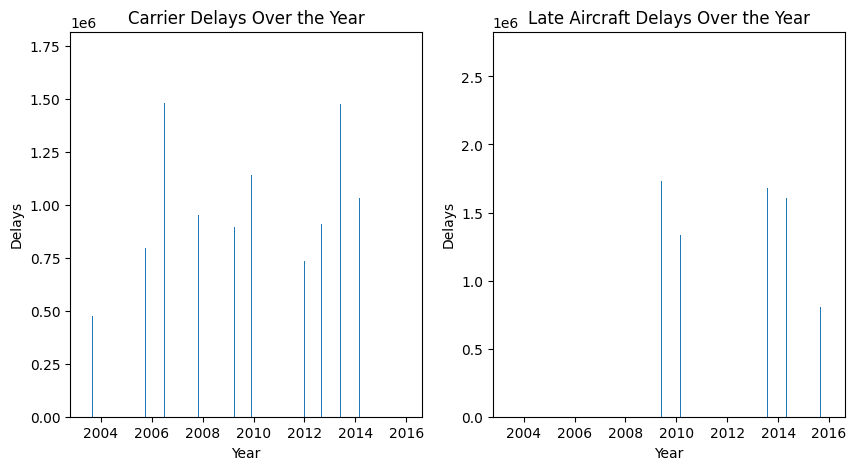

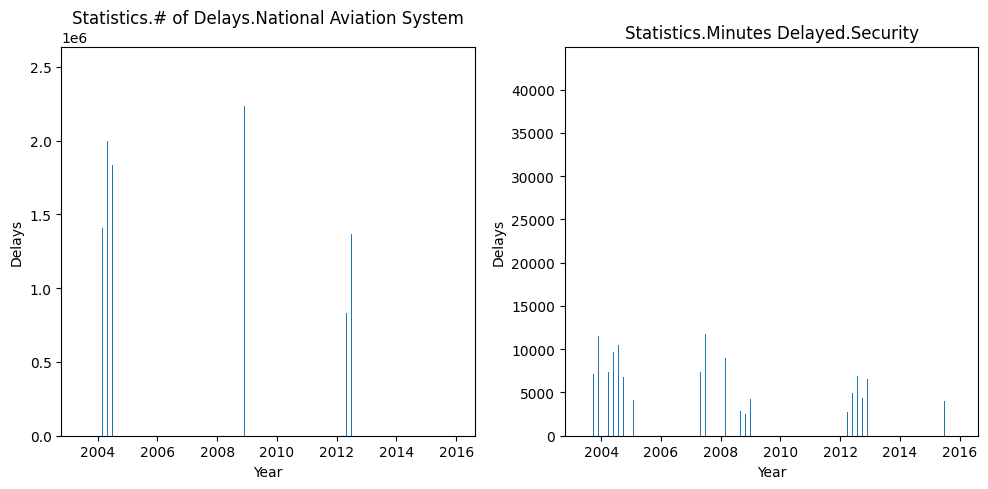

In [8]:
data_carrier = df.groupby(['Date']).sum()['Statistics.Minutes Delayed.Carrier'].reset_index()

data_late_aircraft = df.groupby(['Date']).sum()['Statistics.Minutes Delayed.Late Aircraft'].reset_index()

date_late_national_aircraft = df.groupby(['Date']).sum()['Statistics.Minutes Delayed.National Aviation System'].reset_index()

date_late_seq = df.groupby(['Date']).sum()['Statistics.Minutes Delayed.Security'].reset_index()

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].bar(data_carrier['Date'], data_carrier['Statistics.Minutes Delayed.Carrier'])
axs[0].set_title('Carrier Delays Over the Year')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Delays')

axs[1].bar(data_late_aircraft['Date'], data_late_aircraft['Statistics.Minutes Delayed.Late Aircraft'])
axs[1].set_title('Late Aircraft Delays Over the Year')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Delays')

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].bar(date_late_national_aircraft['Date'], date_late_national_aircraft['Statistics.Minutes Delayed.National Aviation System'])
axs[0].set_title('Statistics.# of Delays.National Aviation System')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Delays')

axs[1].bar(date_late_seq['Date'], date_late_seq['Statistics.Minutes Delayed.Security'])
axs[1].set_title('Statistics.Minutes Delayed.Security')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Delays')

plt.tight_layout()
plt.show()


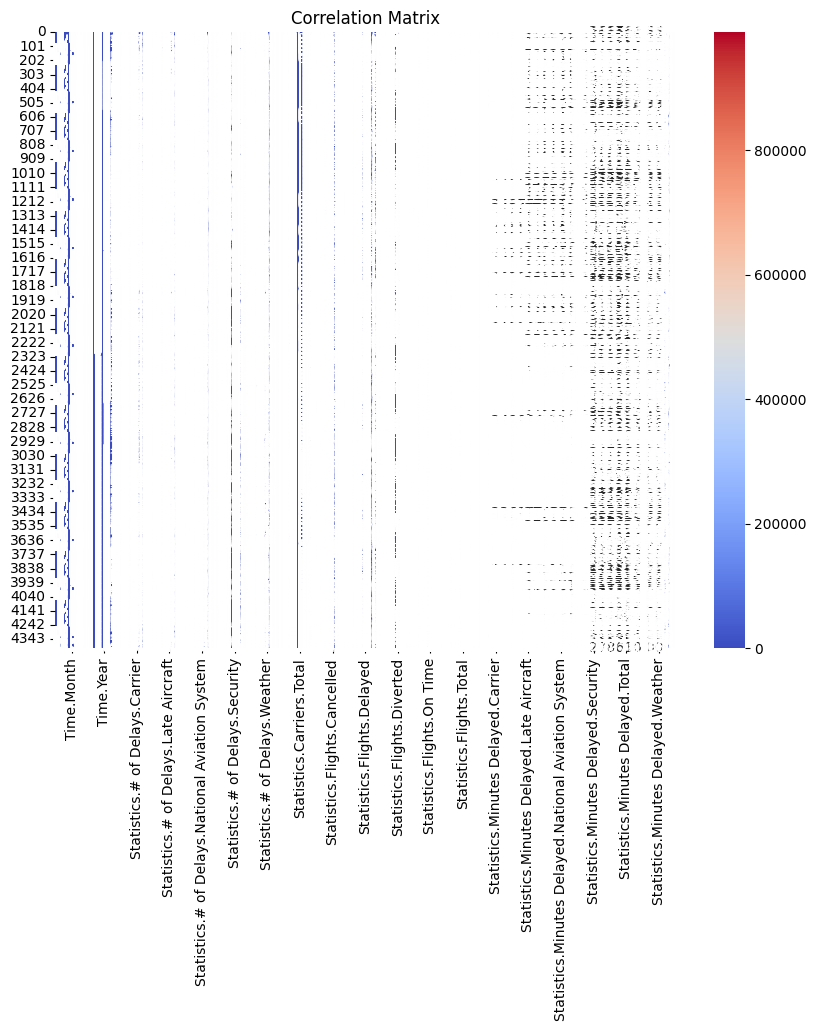

In [91]:
num_col = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[num_col]
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

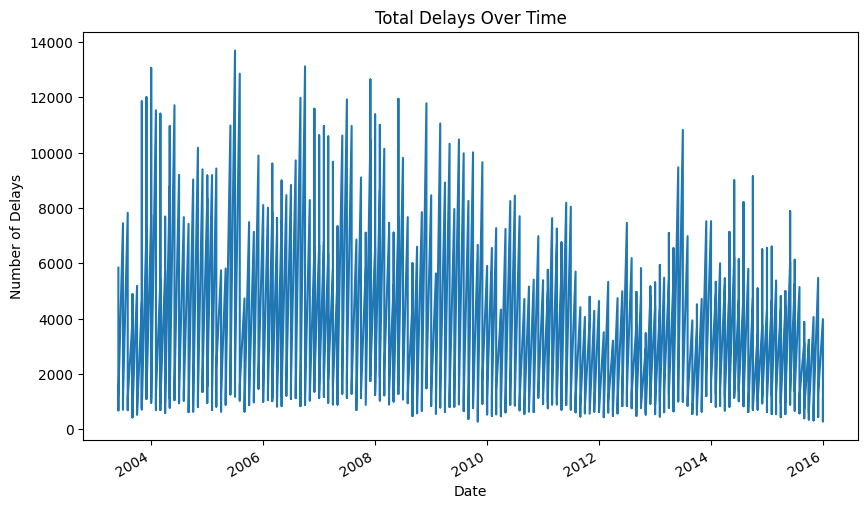

In [9]:
df['Date'] = pd.to_datetime(df['Date'])  # Convert 'Date' column to datetime format
time_series_df = df.set_index('Date')
# Example: Plot total delays over time
plt.figure(figsize=(10, 6))
time_series_df['Statistics.Flights.Delayed'].plot()
plt.title('Total Delays Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Delays')
plt.show()

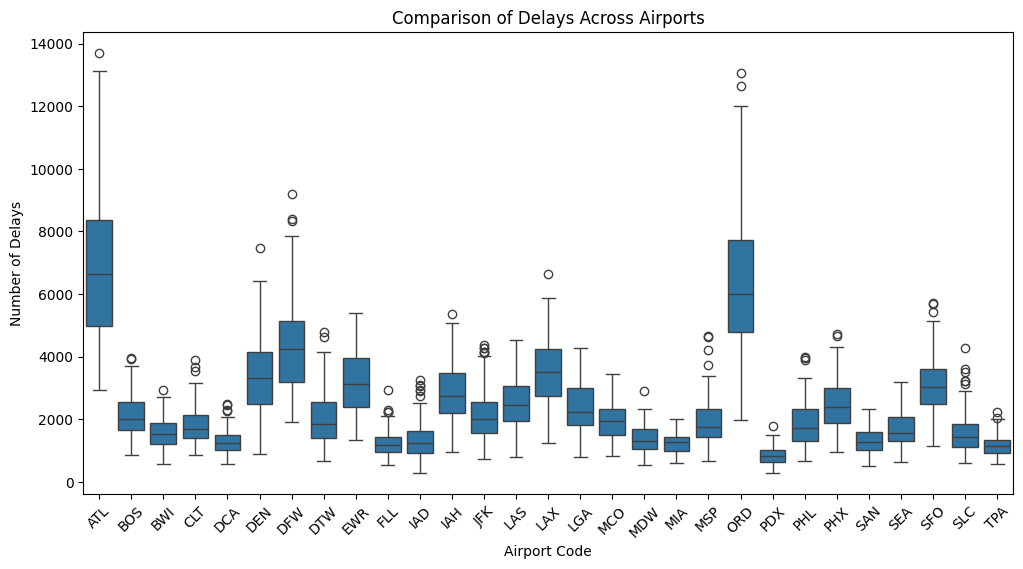

In [10]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Airport.Code', y='Statistics.Flights.Delayed', data=df)
plt.title('Comparison of Delays Across Airports')
plt.xlabel('Airport Code')
plt.ylabel('Number of Delays')
plt.xticks(rotation=45)
plt.show()

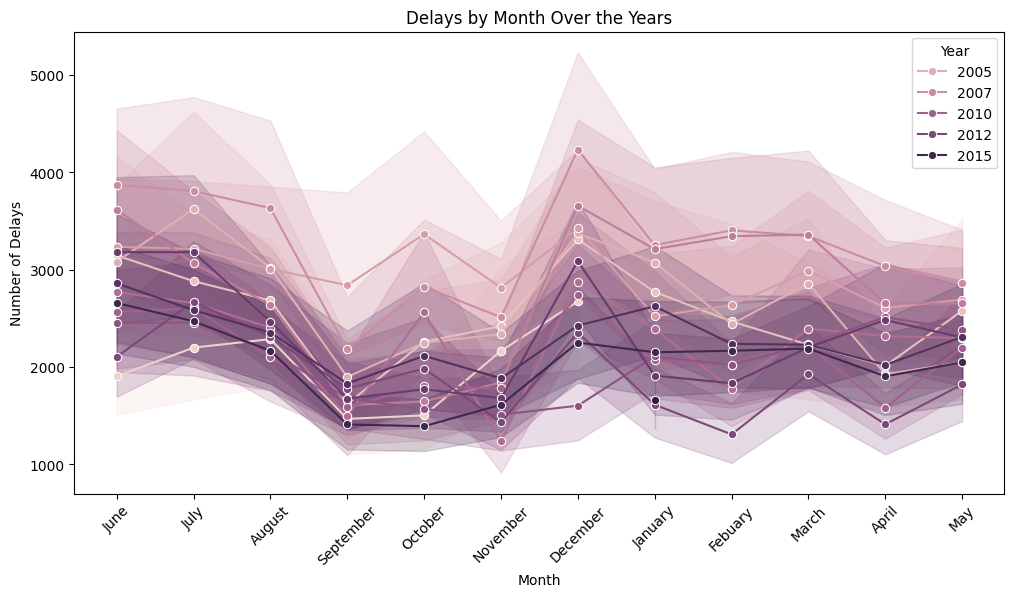

In [11]:
# Plotting delays by month over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Time.Month Name', y='Statistics.Flights.Delayed', hue='Time.Year', marker='o')
plt.title('Delays by Month Over the Years')
plt.xlabel('Month')
plt.ylabel('Number of Delays')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.show()


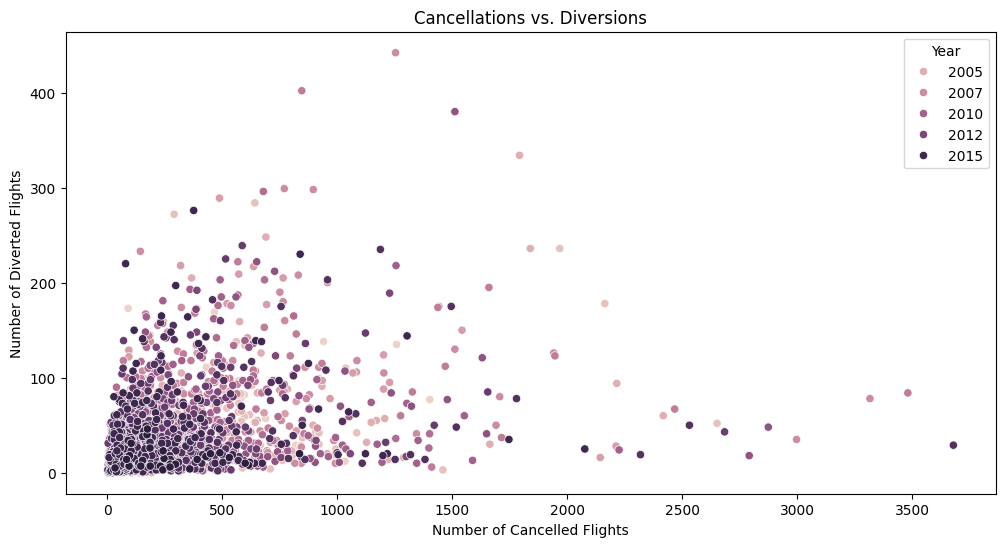

In [12]:
# Investigating cancellations and diversions
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Statistics.Flights.Cancelled', y='Statistics.Flights.Diverted', hue='Time.Year')
plt.title('Cancellations vs. Diversions')
plt.xlabel('Number of Cancelled Flights')
plt.ylabel('Number of Diverted Flights')
plt.legend(title='Year')
plt.show()